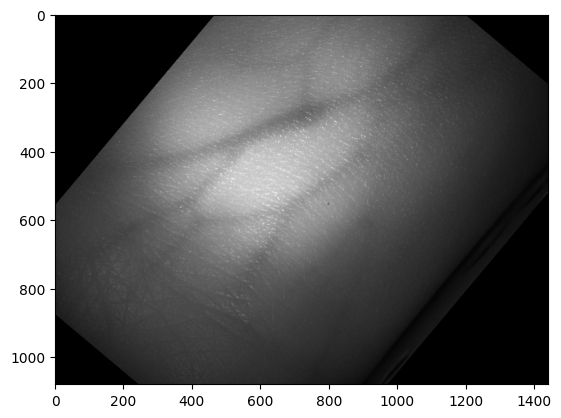

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

image = cv2.imread('/content/hand (66)50 deg rotated .png', cv2.IMREAD_GRAYSCALE)

plt.imshow(image, cmap='gray')

0.04556465148925781


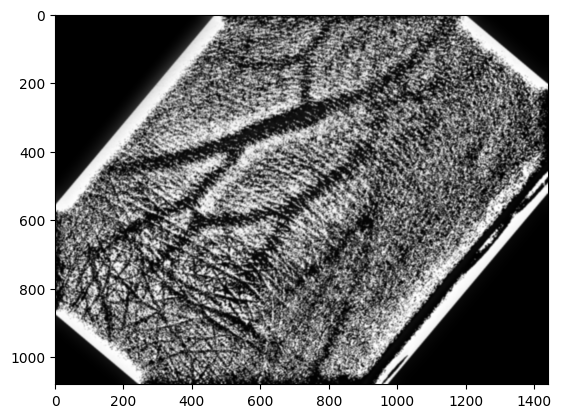

In [3]:
begin = time.time()
img_smoothed = cv2.blur(image, (81,81))
inverted = cv2.bitwise_not(img_smoothed)

max_brightness = np.max(image)

# Calculate the reverse light component
img_reverse_light = max_brightness - inverted
output = img_reverse_light - image

output_lowpass = cv2.GaussianBlur(output, (9, 9), 0)
end = time.time()

print(end - begin)
plt.imshow(output_lowpass, cmap='gray')

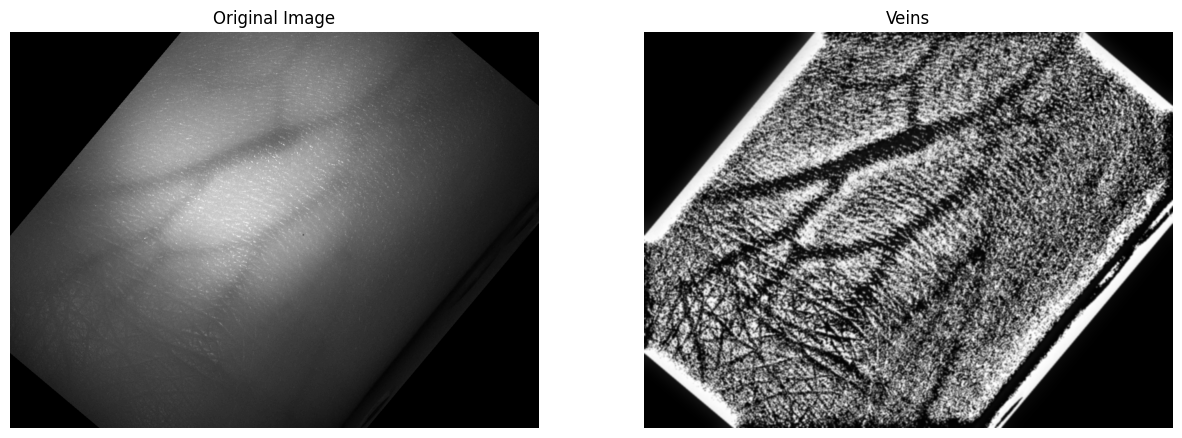

In [4]:
plt.figure(figsize=(15, 10))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Enhanced Image
plt.subplot(1, 2, 2)
plt.imshow(output_lowpass, cmap='gray')
plt.title('Veins')
plt.axis('off')


plt.show()

In [5]:
def getVeins(image):
  img_smoothed = cv2.blur(image, (81,81))
  inverted = cv2.bitwise_not(img_smoothed)

  max_brightness = np.max(image)

  # Calculate the reverse light component
  img_reverse_light = max_brightness - inverted
  output = img_reverse_light - image

  output_lowpass = cv2.GaussianBlur(output, (9, 9), 0)

  return output_lowpass

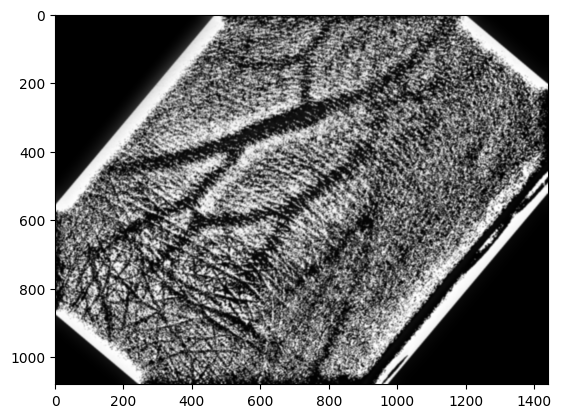

In [6]:
result = getVeins(image)
plt.imshow(result, cmap='gray')

In [ ]:
import os
import cv2
from google.colab import drive
import numpy as np
from matplotlib import pyplot as plt
import time

def main():
    # Mount Google Drive
    drive.mount('/content/drive')

    # Specify the path to the shared folder containing your images in Google Drive
    shared_folder = '/content/drive/MyDrive/input'

    # List all files in the shared folder
    image_files = [f for f in os.listdir(shared_folder) if os.path.isfile(os.path.join(shared_folder, f))]

    # Create a directory to store the processed images
    output_dir_colab = '/content/output_images'
    os.makedirs(output_dir_colab, exist_ok=True)

    aver_time = 0
    count = 0
    # Iterate through each image file
    for image_file in image_files:
        count = count+1
        # Read the original image
        image_path = os.path.join(shared_folder, image_file)
        original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        # Check if the image is successfully loaded
        if original_image is not None:
            # Apply the processing function
            begin = time.time()
            processed_image = getVeins(original_image)
            end = time.time()
            aver_time += (end - begin)

            # Create a composite image with original on the left and processed on the right
            composite_image = np.concatenate((original_image, processed_image), axis=1)

            # Add titles for both images
            title = f"Original | Processed"
            cv2.putText(composite_image, title, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

            # Save the composite image in the output directory
            output_path = os.path.join(output_dir_colab, f"composite_{image_file}")
            cv2.imwrite(output_path, composite_image)

    print(f"Time taken to extract veins on average: {aver_time / count}")

    # Zip the processed images
    zip_file_path = '/content/processed_images.zip'
    os.system(f"zip -r {zip_file_path} {output_dir_colab}")

    # Move the zip file to Google Drive
    drive_output_path = '/content/drive/MyDrive/processed_images.zip'
    os.rename(zip_file_path, drive_output_path)

if __name__ == "__main__":
    main()
